In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df = pd.read_csv('adult.csv')
print(df.head(5))
print(df.tail(5))
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.columns)

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
print('df shape:', df.shape)
print('df size:', df.size)
print('df.ndim:', df.ndim, '\n')
print('df.index:', df.index)
print('df.columns:', df.columns)

df shape: (32561, 15)
df size: 488415
df.ndim: 2 

df.index: RangeIndex(start=0, stop=32561, step=1)
df.columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
records_number = len(df)

greater_50k = len(df.query('income == ">50K"'))

atmost_50k = len(df.query('income == "<=50K"'))

greater_50k_percent = (float(greater_50k) / records_number * 100)

print("Total number of records: {}".format(records_number))
print("individuals's income exceeds $50,000: {}".format(greater_50k))
print("individuals's income is at most $50,000: {}".format(atmost_50k))
print("Percentage of individuals's income exceeds $50,000: {:.2f}%".format(greater_50k_percent))

Total number of records: 32561
individuals's income exceeds $50,000: 7841
individuals's income is at most $50,000: 24720
Percentage of individuals's income exceeds $50,000: 24.08%


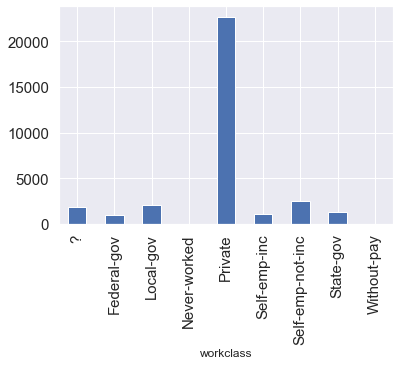

In [12]:
# work class

df.groupby(["workclass"]).size().plot(kind="bar", fontsize=15)

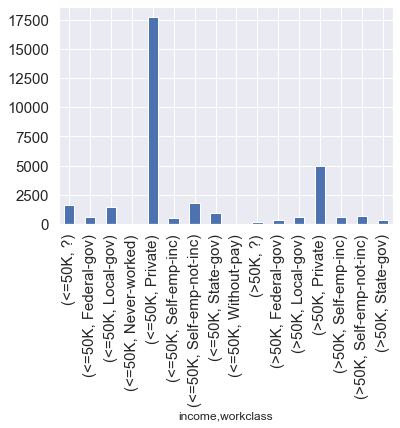

In [13]:
df.groupby(["income", "workclass"]).size().plot(kind = "bar", fontsize=15)

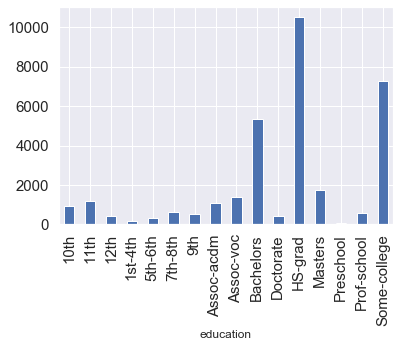

In [14]:
## education

df.groupby(["education"]).size().plot(kind = "bar", fontsize=15)

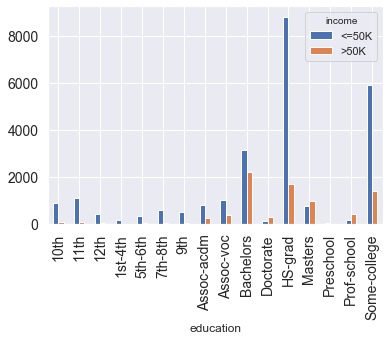

In [17]:
df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)

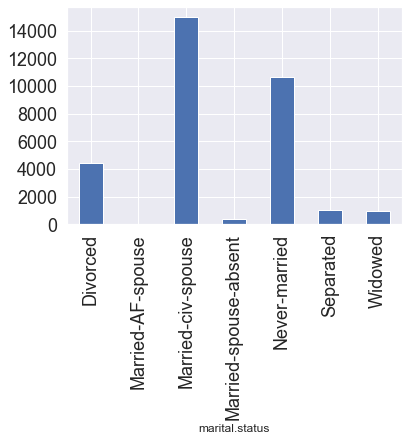

In [19]:
## marital status

df.groupby(["marital.status"]).size().plot(kind="bar", fontsize=18)

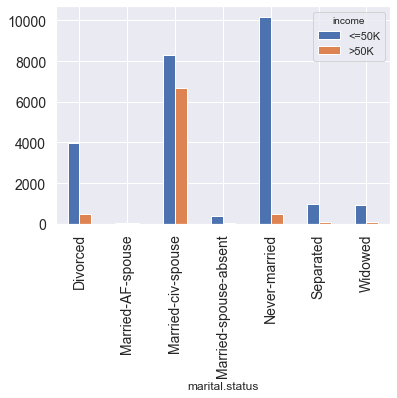

In [20]:
df.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=14)

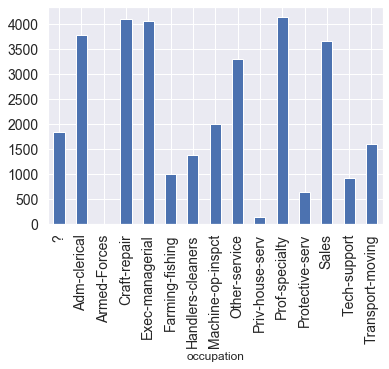

In [22]:
## occupation

df.groupby(["occupation"]).size().plot(kind="bar",fontsize=14,x=df.groupby(["occupation"]).size(),y=df[["occupation"]])

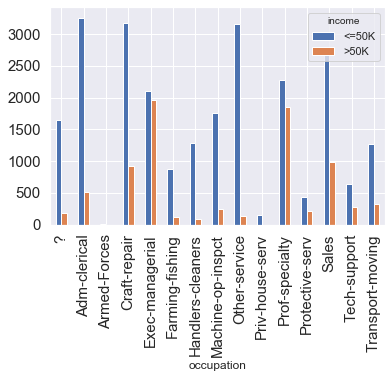

In [24]:
df.groupby(["income", "occupation"]).size().unstack("income").plot(kind="bar", fontsize=15)

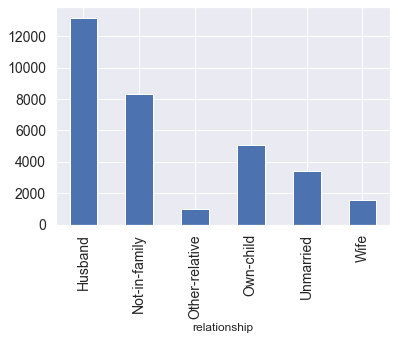

In [25]:
# relationship

df.groupby(["relationship"]).size().plot(kind="bar", fontsize=14)

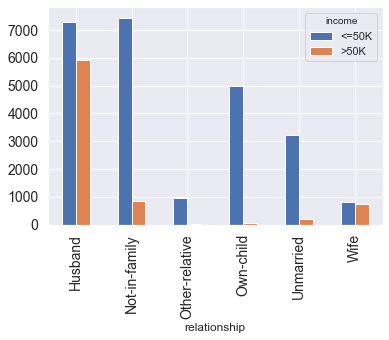

In [26]:
df.groupby(["income", "relationship"]).size().unstack("income").plot(kind="bar", fontsize=14)

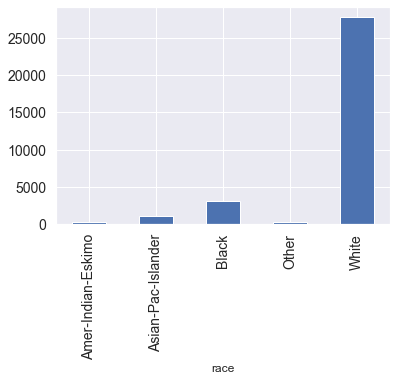

In [27]:
# race

df.groupby(["race"]).size().plot(kind="bar", fontsize=14)

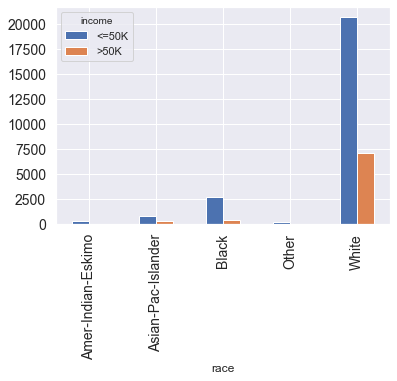

In [28]:
df.groupby(["income", "race"]).size().unstack("income").plot(kind="bar", fontsize=14)

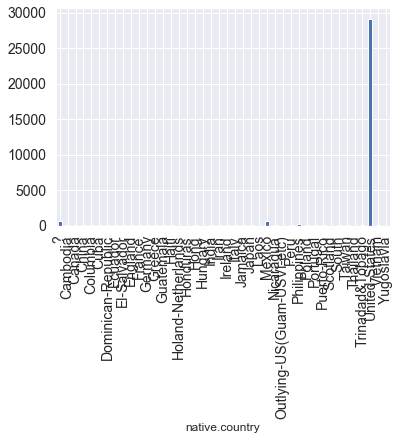

In [29]:
# native country

df.groupby(["native.country"]).size().plot(kind="bar", fontsize=14)

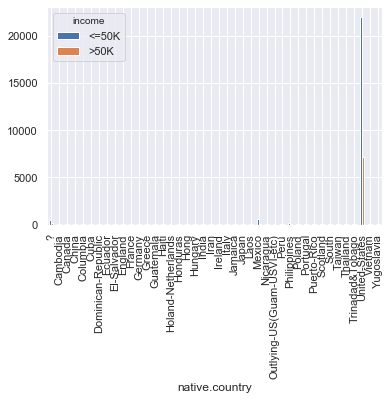

In [32]:
df.groupby(["income","native.country"]).size().unstack("income").plot(kind="bar")

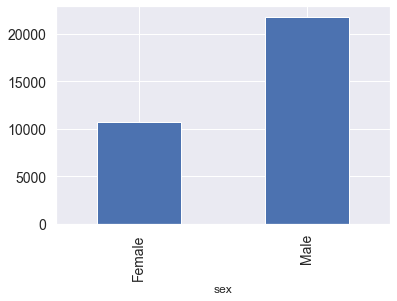

In [33]:
# sex

df.groupby(["sex"]).size().plot(kind = "bar", fontsize=14)

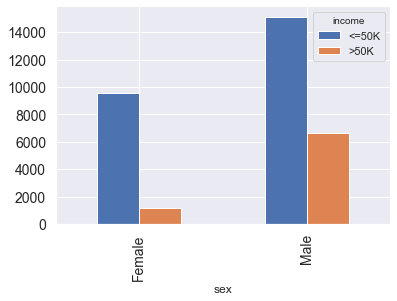

In [34]:
df.groupby(["income", "sex"]).size().unstack("income").plot(kind="bar", fontsize=14)

In [35]:
df.pivot_table(df, index = ['income'], aggfunc = np.mean)

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


In [36]:
import seaborn as sns

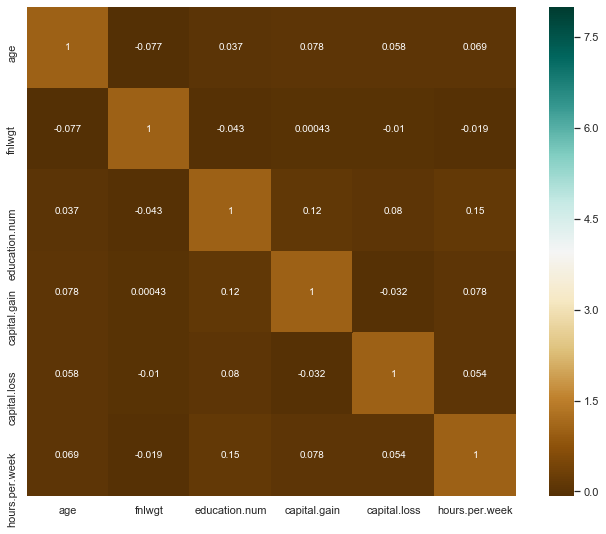

In [37]:
hmap = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(hmap, vmax = 8, annot=True, cmap = 'BrBG', square=True)

In [38]:
df = df.drop(columns = 'fnlwgt')

In [39]:
def questionmark_number(x):
    return sum(x == '?')
df.apply(questionmark_number)

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [40]:
print('1.workclass:', set(df['workclass']))

1.workclass: {'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Private', 'Self-emp-inc', '?', 'Never-worked', 'Without-pay', 'Federal-gov'}


In [41]:
df['workclass'] = df['workclass'].map({'?':-1, 'Without-pay':0,'Never-worked':1, 'Local-gov':2,'State-gov':3, 'Federal-gov':3,
                                      'Private':4, 'Self-emp-not-inc':5, 'Self-emp-inc':6})

In [42]:
education_set = set(df['education'])
print('2.education:', education_set)

2.education: {'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Doctorate', 'Prof-school', '11th', '1st-4th', 'Preschool', 'HS-grad', '7th-8th', '9th', '10th', 'Some-college', '5th-6th', '12th', 'Masters'}


In [44]:
df['education'] = df['education'].map({'Preschool':0,'1st-4th':1,'5th-6th':2, '7th-8th':3,
                                      '9th':4, '10th':5, '11th':6, '12th':7, 'Prof-school':8, 
                                      'HS-grad':9, 'Some-college':10, 'Assoc-voc':11, 'Assoc-acdm':12,
                                       'Bachelors':13, 'Masters':14, 'Doctorate':15})

In [45]:
maritalstatus_set = set(df['marital.status']) 
print('3.marital.status:',maritalstatus_set)

3.marital.status: {'Widowed', 'Married-AF-spouse', 'Separated', 'Never-married', 'Married-spouse-absent', 'Married-civ-spouse', 'Divorced'}


In [46]:
df['marital.status'] = df['marital.status'].map({'Never-married':0,'Widowed':1,'Divorced':2, 'Separated':3,
                                      'Married-spouse-absent':4, 'Married-civ-spouse':5, 'Married-AF-spouse':6})

In [47]:
print('4.occupation:',set(df['occupation']))

4.occupation: {'Transport-moving', 'Adm-clerical', 'Tech-support', 'Farming-fishing', 'Prof-specialty', 'Sales', 'Machine-op-inspct', 'Other-service', 'Protective-serv', 'Craft-repair', 'Armed-Forces', 'Priv-house-serv', '?', 'Handlers-cleaners', 'Exec-managerial'}


In [48]:
df['occupation'] = df['occupation'].map({'?':-1,'Priv-house-serv':0,'Protective-serv':1,'Handlers-cleaners':2, 'Machine-op-inspct':3,
                                      'Adm-clerical':4, 'Farming-fishing':5, 'Transport-moving':6, 'Craft-repair':7, 'Other-service':8,
                                       'Tech-support':9, 'Sales':10, 'Exec-managerial':11, 'Prof-specialty':12, 'Armed-Forces':13 })

In [49]:
print('5.relationship:',set(df['relationship']))

5.relationship: {'Not-in-family', 'Other-relative', 'Wife', 'Unmarried', 'Own-child', 'Husband'}


In [50]:
df['relationship'] = df['relationship'].map({'Unmarried':0,'Other-relative':1, 'Not-in-family':2,
                                      'Wife':3, 'Husband':4,'Own-child':5})

In [51]:
print('6.race:',set(df['race']) )

6.race: {'White', 'Black', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander'}


In [52]:
df['race'] = df['race'].map({'Black':0,'Asian-Pac-Islander':1,'Amer-Indian-Eskimo':2, 'Other':3,
                                      'White':4})

In [53]:
print('7.sex:',set(df['sex']))

7.sex: {'Female', 'Male'}


In [54]:
df['sex'] = df['sex'].map({'Male':0,'Female':1})

In [55]:
print('8.native-country:',set(df['native.country']))

8.native-country: {'Ireland', 'Jamaica', 'Canada', 'Hungary', 'Taiwan', 'United-States', 'Germany', 'Japan', '?', 'Poland', 'Vietnam', 'England', 'Peru', 'India', 'Outlying-US(Guam-USVI-etc)', 'China', 'Portugal', 'Columbia', 'South', 'Puerto-Rico', 'Trinadad&Tobago', 'Hong', 'Haiti', 'Greece', 'Dominican-Republic', 'Laos', 'Guatemala', 'France', 'Yugoslavia', 'Honduras', 'Thailand', 'Scotland', 'Philippines', 'Mexico', 'Italy', 'Nicaragua', 'Iran', 'Cuba', 'Cambodia', 'Ecuador', 'El-Salvador', 'Holand-Netherlands'}


In [56]:
df['native.country'] = df['native.country'].map({'?':-1,'Puerto-Rico':0,'Haiti':1,'Cuba':2, 'Iran':3,
                                      'Honduras':4, 'Jamaica':5, 'Vietnam':6, 'Mexico':7, 'Dominican-Republic':8,
                                       'Laos':9, 'Ecuador':10, 'El-Salvador':11, 'Cambodia':12, 'Columbia':13,
                                         'Guatemala':14, 'South':15, 'India':16, 'Nicaragua':17, 'Yugoslavia':18, 
                                         'Philippines':19, 'Thailand':20, 'Trinadad&Tobago':21, 'Peru':22, 'Poland':23, 
                                         'China':24, 'Hungary':25, 'Greece':26, 'Taiwan':27, 'Italy':28, 'Portugal':29, 
                                         'France':30, 'Hong':31, 'England':32, 'Scotland':33, 'Ireland':34, 
                                         'Holand-Netherlands':35, 'Canada':36, 'Germany':37, 'Japan':38, 
                                         'Outlying-US(Guam-USVI-etc)':39, 'United-States':40
                                        })

In [57]:
print('9.income:',set(df['income']) )

9.income: {'<=50K', '>50K'}


In [58]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [59]:
x = df.iloc[ : ,:-1].values.astype(int)
x

array([[  90,   -1,    9, ..., 4356,   40,   40],
       [  82,    4,    9, ..., 4356,   18,   40],
       [  66,   -1,   10, ..., 4356,   40,   40],
       ...,
       [  40,    4,    9, ...,    0,   40,   40],
       [  58,    4,    9, ...,    0,   40,   40],
       [  22,    4,    9, ...,    0,   20,   40]])

In [60]:
y = df[['income']]

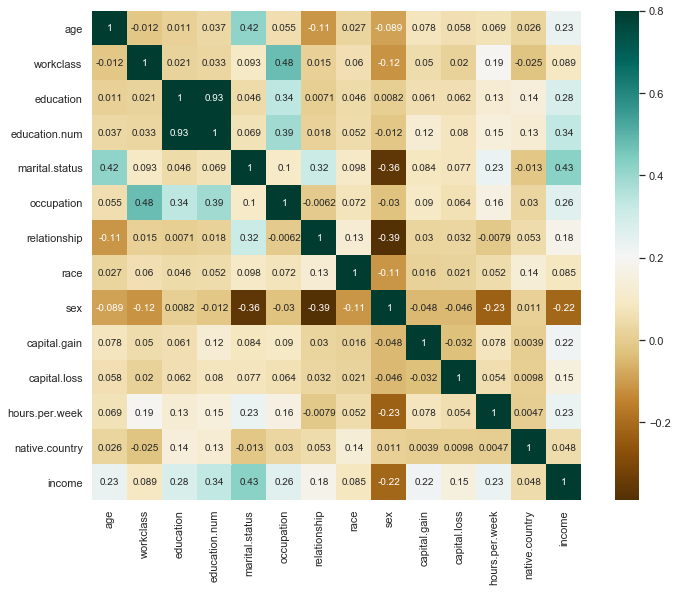

In [61]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [64]:
y_train.groupby(["income"]).size()

income
0    19754
1     6294
dtype: int64

In [65]:
def transet_atmost_50k(x):
    return sum(x==0)
def transet_greater_than_50k(x):
    return sum(x==1)

In [66]:
transet_greater_than_50k_n = float(y_train.apply(transet_greater_than_50k)/y_train.size)

In [67]:
("Tranining set's Percentage of individuals making more than $50,000: ", "{:.2f}%".format(transet_greater_than_50k_n*100))

("Tranining set's Percentage of individuals making more than $50,000: ",
 '24.16%')

In [68]:
## establishing the model

classifier1 = DecisionTreeClassifier()
classifier1.fit(x_train, y_train)
y_predict1_test = classifier1.predict(x_test)
y_predict1_train = classifier1.predict(x_train)
classifier1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
classifier2 = DecisionTreeClassifier(max_leaf_nodes=8)
classifier2.fit(x_train, y_train)
y_predict2_test=classifier2.predict(x_test)
y_predict2_train=classifier2.predict(x_train)

classifier3 = DecisionTreeClassifier(max_leaf_nodes=16)
classifier3.fit(x_train, y_train)
y_predict3_test=classifier3.predict(x_test)
y_predict3_train=classifier3.predict(x_train)

classifier4 = DecisionTreeClassifier(max_leaf_nodes=32)
classifier4.fit(x_train, y_train)
y_predict4_test=classifier4.predict(x_test)
y_predict4_train=classifier4.predict(x_train)

classifier5 = DecisionTreeClassifier(max_leaf_nodes=64)
classifier5.fit(x_train, y_train)
y_predict5_test=classifier5.predict(x_test)
y_predict5_train=classifier5.predict(x_train)

classifier6 = DecisionTreeClassifier(max_leaf_nodes=128)
classifier6.fit(x_train, y_train)
y_predict6_test=classifier6.predict(x_test)
y_predict6_train=classifier6.predict(x_train)

In [70]:
classifier7 = DecisionTreeClassifier(min_impurity_decrease=0.001)
classifier7.fit(x_train, y_train)
y_predict7_test=classifier7.predict(x_test)
y_predict7_train=classifier7.predict(x_train)

classifier8 = DecisionTreeClassifier(min_impurity_decrease=0.01)
classifier8.fit(x_train, y_train)
y_predict8_test=classifier8.predict(x_test)
y_predict8_train=classifier8.predict(x_train)

classifier9 = DecisionTreeClassifier(min_impurity_decrease=0.02)
classifier9.fit(x_train, y_train)
y_predict9_test=classifier9.predict(x_test)
y_predict9_train=classifier9.predict(x_train)

classifier10 = DecisionTreeClassifier(min_impurity_decrease=0.03)
classifier10.fit(x_train, y_train)
y_predict10_test=classifier10.predict(x_test)
y_predict10_train=classifier10.predict(x_train)

classifier11 = DecisionTreeClassifier(min_impurity_decrease=0.04)
classifier11.fit(x_train, y_train)
y_predict11_test=classifier11.predict(x_test)
y_predict11_train=classifier11.predict(x_train)

In [71]:
classifier12 = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=80)
classifier12.fit(x_train, y_train)
y_predict12_test=classifier12.predict(x_test)
y_predict12_train=classifier12.predict(x_train)

classifier13 = DecisionTreeClassifier(min_samples_leaf=80, min_samples_split=160)
classifier13.fit(x_train, y_train)
y_predict13_test=classifier13.predict(x_test)
y_predict13_train=classifier13.predict(x_train)

classifier14 = DecisionTreeClassifier(min_samples_leaf=160, min_samples_split=320)
classifier14.fit(x_train, y_train)
y_predict14_test=classifier14.predict(x_test)
y_predict14_train=classifier14.predict(x_train)

classifier15 = DecisionTreeClassifier(min_samples_leaf=320, min_samples_split=640)
classifier15.fit(x_train, y_train)
y_predict15_test=classifier15.predict(x_test)
y_predict15_train=classifier15.predict(x_train)

classifier16 = DecisionTreeClassifier(min_samples_leaf=640, min_samples_split=1280)
classifier16.fit(x_train, y_train)
y_predict16_test=classifier16.predict(x_test)
y_predict16_train=classifier16.predict(x_train)

In [72]:
classifier17 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.01)
classifier17.fit(x_train, y_train)
y_predict17_test=classifier17.predict(x_test)
y_predict17_train=classifier17.predict(x_train)

classifier18 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.02)
classifier18.fit(x_train, y_train)
y_predict18_test=classifier18.predict(x_test)
y_predict18_train=classifier18.predict(x_train)

classifier19 = DecisionTreeClassifier(max_leaf_nodes=16,min_impurity_decrease=0.001)
classifier19.fit(x_train, y_train)
y_predict19_test=classifier19.predict(x_test)
y_predict19_train=classifier19.predict(x_train)

In [73]:
classifier20 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=40, min_samples_split=80)
classifier20.fit(x_train, y_train)
y_predict20_test=classifier20.predict(x_test)
y_predict20_train=classifier20.predict(x_train)

classifier21 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=80, min_samples_split=160)
classifier21.fit(x_train, y_train)
y_predict21_test=classifier21.predict(x_test)
y_predict21_train=classifier21.predict(x_train)

classifier22 = DecisionTreeClassifier(max_leaf_nodes=16,min_samples_leaf=160, min_samples_split=320)
classifier22.fit(x_train, y_train)
y_predict22_test=classifier22.predict(x_test)
y_predict22_train=classifier22.predict(x_train)

In [74]:
## model evaluation

print("Classifier1(default) Accuracy:", '%f'%classifier1.score(x_test, y_test))
print("Classifier2(max_leaf_nodes=8) Accuracy:", '%f'%classifier2.score(x_test, y_test))
print("Classifier3(max_leaf_nodes=16) Accuracy:", '%f'%classifier3.score(x_test, y_test))
print("Classifier4(max_leaf_nodes=32) Accuracy:", '%f'%classifier4.score(x_test, y_test))
print("Classifier5(max_leaf_nodes=64) Accuracy:", '%f'%classifier5.score(x_test, y_test))
print("Classifier6(max_leaf_nodes=128) Accuracy:", '%f'%classifier6.score(x_test, y_test))
print("Classifier7(min_impurity_decrease=0.001) Accuracy:", '%f'%classifier7.score(x_test, y_test))
print("Classifier8(min_impurity_decrease=0.01) Accuracy:", '%f'%classifier8.score(x_test, y_test))
print("Classifier9(min_impurity_decrease=0.02) Accuracy:", '%f'%classifier9.score(x_test, y_test))
print("Classifier10(min_impurity_decrease=0.03) Accuracy:", '%f'%classifier10.score(x_test, y_test))
print("Classifier11(min_impurity_decrease=0.04) Accuracy:", '%f'%classifier11.score(x_test, y_test))
print("Classifier12(min_samples_leaf=40, min_samples_split=80) Accuracy:", '%f'%classifier12.score(x_test, y_test))
print("Classifier13(min_samples_leaf=80, min_samples_split=160) Accuracy:", '%f'%classifier13.score(x_test, y_test))
print("Classifier14(min_samples_leaf=160, min_samples_split=320) Accuracy:", '%f'%classifier14.score(x_test, y_test))
print("Classifier15(min_samples_leaf=320, min_samples_split=640) Accuracy:", '%f'%classifier15.score(x_test, y_test))
print("Classifier16(min_samples_leaf=640, min_samples_split=1280) Accuracy:", '%f'%classifier16.score(x_test, y_test))
print("Classifier17(max_leaf_nodes=16,min_impurity_decrease=0.001) Accuracy:", '%f'%classifier17.score(x_test, y_test))
print("Classifier18(max_leaf_nodes=16,min_impurity_decrease=0.01) Accuracy:", '%f'%classifier18.score(x_test, y_test))
print("Classifier19(max_leaf_nodes=16,min_impurity_decrease=0.02) Accuracy:", '%f'%classifier19.score(x_test, y_test))
print("Classifier20(max_leaf_nodes=16,min_samples_leaf=40, min_samples_split=80) Accuracy:", '%f'%classifier20.score(x_test, y_test))
print("Classifier21(max_leaf_nodes=16,min_samples_leaf=80, min_samples_split=160) Accuracy:", '%f'%classifier21.score(x_test, y_test))
print("Classifier22(max_leaf_nodes=16,min_samples_leaf=160, min_samples_split=320) Accuracy:", '%f'%classifier22.score(x_test, y_test))

Classifier1(default) Accuracy: 0.818363
Classifier2(max_leaf_nodes=8) Accuracy: 0.844772
Classifier3(max_leaf_nodes=16) Accuracy: 0.851067
Classifier4(max_leaf_nodes=32) Accuracy: 0.860279
Classifier5(max_leaf_nodes=64) Accuracy: 0.864118
Classifier6(max_leaf_nodes=128) Accuracy: 0.861815
Classifier7(min_impurity_decrease=0.001) Accuracy: 0.856595
Classifier8(min_impurity_decrease=0.01) Accuracy: 0.844772
Classifier9(min_impurity_decrease=0.02) Accuracy: 0.818210
Classifier10(min_impurity_decrease=0.03) Accuracy: 0.762475
Classifier11(min_impurity_decrease=0.04) Accuracy: 0.762475
Classifier12(min_samples_leaf=40, min_samples_split=80) Accuracy: 0.859205
Classifier13(min_samples_leaf=80, min_samples_split=160) Accuracy: 0.861201
Classifier14(min_samples_leaf=160, min_samples_split=320) Accuracy: 0.853217
Classifier15(min_samples_leaf=320, min_samples_split=640) Accuracy: 0.853063
Classifier16(min_samples_leaf=640, min_samples_split=1280) Accuracy: 0.834792
Classifier17(max_leaf_nodes=1

In [75]:
## confusion matrix

print(" Classifier 5 confusion matrix:",'\n',confusion_matrix(y_test, y_predict5_test)) 

 Classifier 5 confusion matrix: 
 [[4736  230]
 [ 655  892]]


In [76]:
##### Model evaluation index

print("Classifier 5 model evaluation index：\n", classification_report(y_predict5_test, y_test, target_names=["at_most_50K","greater_than_50K"]))

Classifier 5 model evaluation index：
                   precision    recall  f1-score   support

     at_most_50K       0.95      0.88      0.91      5391
greater_than_50K       0.58      0.80      0.67      1122

        accuracy                           0.86      6513
       macro avg       0.77      0.84      0.79      6513
    weighted avg       0.89      0.86      0.87      6513



In [77]:
## visualizing the decision tree model and analyzing the model result

from sklearn.tree import export_graphviz
import pydotplus

In [78]:
dot_data1 = export_graphviz(classifier3
                           ,out_file=None
                           ,feature_names=['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain', 'capital-loss','hours-per-week','native-country']
                           ,class_names=['at_most_50K','greater_than_50K']
                           ,filled=True
                           ,rounded=True
                           ,special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)

In [79]:
from IPython.display import Image


In [83]:
Image(graph1.create_png())

InvocationException: GraphViz's executables not found

In [82]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
